In [4]:
import tensorflow.compat.v1 as tf

In [6]:
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
# 09강 텐서플로우 아키텍처
# - 클라이언트: 파이썬, C++ 등의 언어로 작성, 세션을 통해 한 번의 그래프 실행 시작 알림
# - 분산된 마스터: 작업자 서비스가 실행할 그래프 조각을 초기화 (Task 분할자, 그래프 분할 역할)
# - 작업자 서비스: HW 가 실행할 그래프 작업을 관리, 작업자 서비스끼리 데이터를 공유함
# - 커널: 실제 그래프 조각들을 실행하는 작업자

In [15]:
# 10강 텐서플로우 세션
# - 텐서 플로우에서 데이터의 처리 단위는 텐서이다.
# - 텐서: 일종의 다차원 배열 객체이며 간단한 자료형을 나타내지 않음

a = tf.constant(1)
b = tf.constant(2)
c = tf.add(a, b)
print(c) # 그래프(텐서)를 정의한 것이지 연산을 수행한 것이 아님

Tensor("Add_3:0", shape=(), dtype=int32)


In [16]:
sess = tf.Session()
sess.run(c)

3

In [18]:
# 11강 K-평균 개요
# 클러스터링: 대표적인 비지도학습 알고리즘
# - 무작위 중심(Centroid) 값 선택 알고리즘
# - K-means++ 알고리즘: 자동으로 클러스터의 중심 위치를 찾는다.

In [19]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
sample = np.random.randint(1, 100, size=(30, 2)) # 30개의 2차원 배열 랜덤 생성
df = pd.DataFrame(sample, columns=['x', 'y'])
print(df)

     x   y
0   93  16
1   79  58
2   10  77
3   33  92
4   36  89
5   10  73
6   41  43
7   29  81
8   35  16
9   56  49
10  75  48
11  17  29
12   3  50
13  14  52
14  97  49
15  98  57
16  39  20
17  60  23
18  94  71
19   7  31
20  23  97
21  38  47
22  31  35
23  21  52
24  46  71
25  42  55
26  28  16
27  74  36
28  58   4
29   3  16


In [27]:
df.loc[29] = [1,1] # 직접 데이터 locate 시키기
print(df)

     x   y
0   93  16
1   79  58
2   10  77
3   33  92
4   36  89
5   10  73
6   41  43
7   29  81
8   35  16
9   56  49
10  75  48
11  17  29
12   3  50
13  14  52
14  97  49
15  98  57
16  39  20
17  60  23
18  94  71
19   7  31
20  23  97
21  38  47
22  31  35
23  21  52
24  46  71
25  42  55
26  28  16
27  74  36
28  58   4
29   1   1


Text(24.500000000000007, 0.5, 'y')

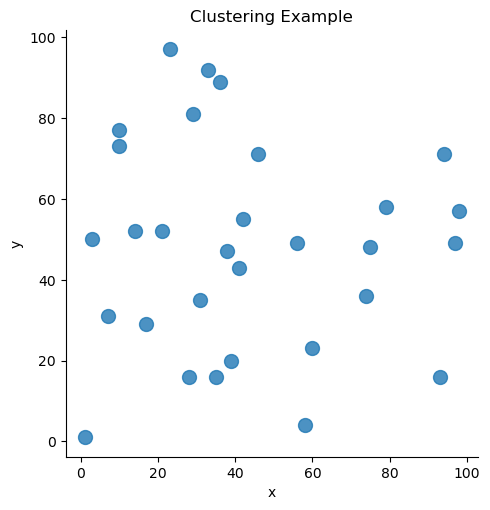

In [28]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100})
plt.title('Clustering Example')
plt.xlabel('x')
plt.ylabel('y')

In [29]:
poinots = df.values
kmeans = KMeans(n_clusters=4, n_init=10).fit(poinots) # K-Means++ 알고리즘이 적용되어, 재실행할 때마다 값이 달라질 수 있다
kmeans.cluster_centers_ # 각 클러스터 중심의 위치 출력

z:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[10.5       , 35.83333333],
       [87.14285714, 47.85714286],
       [42.8       , 30.8       ],
       [26.71428571, 82.85714286]])

In [30]:
# 각 데이터에 매칭된 클러스터 라벨 출력
kmeans.labels_

array([1, 1, 3, 3, 3, 3, 2, 3, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 3, 2,
       2, 0, 3, 2, 2, 1, 2, 0])

In [31]:
df['cluster'] = kmeans.labels_
df.head(30) # 앞에서부터 30개 출력

,x,y,cluster
0,93,16,1
1,79,58,1
2,10,77,3
3,33,92,3
4,36,89,3
5,10,73,3
6,41,43,2
7,29,81,3
8,35,16,2
9,56,49,2


Text(37.348802083333325, 0.5, 'y')

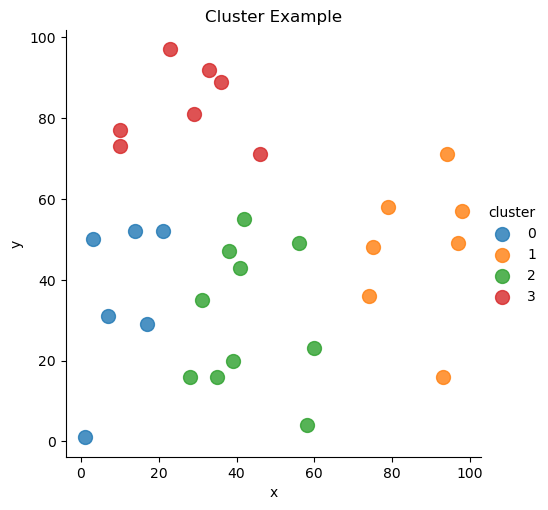

In [32]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100}, hue="cluster")
plt.title('Cluster Example')
plt.xlabel('x')
plt.ylabel('y')

In [33]:
# K-NN 과 K-Means 차이
# - 분류 vs 군집
# - 지도학습 vs 비지도학습
# - 레이블 有 vs 레이블 無
# - 라벨링 차이

# K-Nearest Neighbor
# - K 의 크기에 따라, 각 거리 안에 더 많이 존재하는 클러스터에 매칭한다.